# Neural Network For Handwritten Digits Classification

https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7&ab_channel=codebasics

In [2]:
%%HTML
<iframe frameborder="0" scrolling="no" marginheight="0" marginwidth="0"width="800" height="443" type="text/html" src="https://www.youtube.com/embed/iqQgED9vV7k?autoplay=0&fs=0&iv_load_policy=3&showinfo=0&rel=0&cc_load_policy=0&start=0&end=0"></iframe>

In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
len(X_train)

60000

In [34]:
len(X_test)

10000

In [36]:
X_train[0].shape

(28, 28)

In [37]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

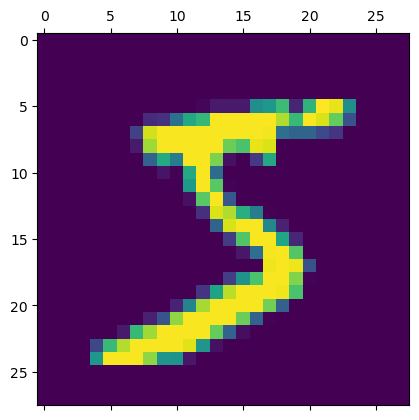

In [38]:
plt.matshow(X_train[0])

In [10]:
y_train[2]

4

In [50]:
X_train = X_train / 255
X_test = X_test / 255

In [55]:
# dataset is loaded 
# we want to flatten dataset

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [56]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [57]:
X_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [60]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=10)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid") #Dense is for fully connected neural network
                                                #it has 10 outputs for 10 digits 
                                                #it has 784 inputs for 784 flattened image representation
])

model.compile(
    optimizer = "adam",
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.fit(X_train_flattened, y_train_encoded, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1878 - accuracy: 0.5778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9767 - accuracy: 0.7089
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7903 - accuracy: 0.7375
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6265 - accuracy: 0.7635
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4837 - accuracy: 0.7738


In [62]:
y_test_encoded = to_categorical(y_test, num_classes=10)

model.evaluate(X_test_flattened, y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 1.4040 - accuracy: 0.8047


[1.4040367603302002, 0.8047000169754028]

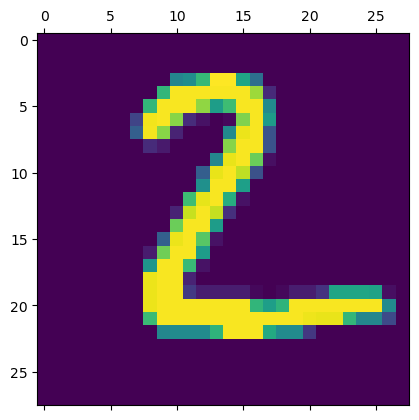

In [67]:
plt.matshow(X_test[1])

In [71]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 1ms/step


array([0.38826507, 0.4070597 , 0.61617494, 0.55130005, 0.18242718,
       0.45102152, 0.5326581 , 0.15518336, 0.39569634, 0.18175484],
      dtype=float32)

In [72]:
np.argmax(y_predicted[1])

2

In [73]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [74]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [77]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 928,    2,    6,   10,    0,    4,   24,    1,    5,    0],
       [   0, 1108,    8,    4,    0,    1,    3,    0,   11,    0],
       [  19,   80,  791,   38,   15,    0,   30,   22,   36,    1],
       [   6,   47,   27,  863,    1,    2,    5,   24,   25,   10],
       [   2,   47,    3,    0,  751,    0,   30,   11,    4,  134],
       [  36,  101,    4,  200,   25,  409,   27,   41,   22,   27],
       [  28,   47,    9,    0,   12,   11,  850,    1,    0,    0],
       [   2,   67,   12,    2,    7,    0,    3,  907,    7,   21],
       [  22,   87,   10,  100,   10,    7,   16,   25,  666,   31],
       [  23,   40,    5,   12,   58,    0,    1,   89,    7,  774]])>

Text(95.72222222222221, 0.5, 'Truth')

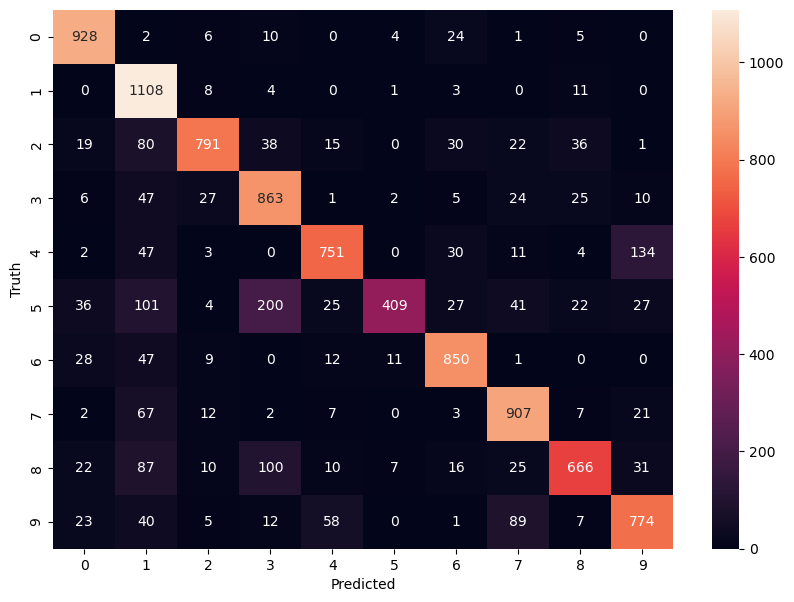

In [78]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [80]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = "relu"), # adding hidden layer
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.fit(X_train_flattened, y_train_encoded, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2525 - accuracy: 0.6862
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5257 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4040 - accuracy: 0.8905
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3575 - accuracy: 0.9008
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3312 - accuracy: 0.9060


In [81]:
model.evaluate(X_test_flattened, y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.9107


[0.31252342462539673, 0.9107000231742859]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

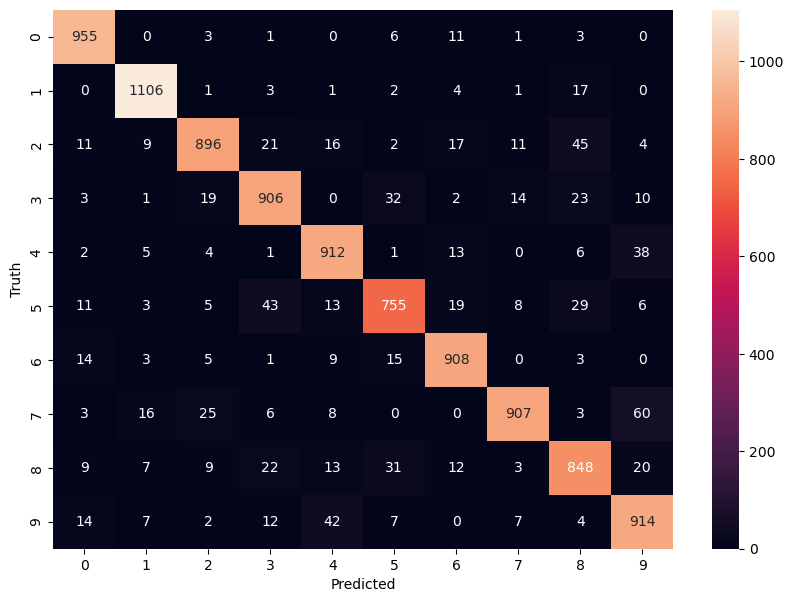

In [83]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [85]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #in this way I do not have to create flattened array
    keras.layers.Dense(100, input_shape=(784,), activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2283 - accuracy: 0.6926
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5146 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3967 - accuracy: 0.8917
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3513 - accuracy: 0.9016
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3262 - accuracy: 0.9071
